In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv("../../housing-data/combined_data.csv")
df

,TRANSID,DATUM,KOOPSOM,WONINGTYPE,SOC,CALCOPP,KAVOPP,BOUWJAAR,COROPPLUSCODE,GEMEENTECODE,...,BERGING_OPP,GARAGE_OPP,BESTEMMING,DUMMY_BERGING,DUMMY_GARAGE,DUMMY_MONUMENT,ENERGIELABEL,FOTOWIJZER_TYPE,POSTCODE_4,PROVINCIECODE
0,8324024,101.0,378000,3.0,1131,124,119,1976,3002,334.0,...,NaN,NaN,1.0,1,0,0,5.0,6,3381,28
1,4695633,20.0,257000,3.0,1131,145,208,2000,2000,107.0,...,NaN,NaN,1.0,1,0,0,7.0,6,1945,27
2,6267016,73.0,397500,3.0,1131,140,130,2014,1500,64.0,...,NaN,NaN,1.0,1,0,0,7.0,6,6663,25
3,6428993,76.0,1100000,3.0,1136,261,162,1912,2601,146.0,...,NaN,NaN,1.0,1,0,0,4.0,6,2582,28
4,5382171,50.0,180000,0.0,1181,50,0,1974,1701,187.0,...,NaN,NaN,1.0,1,0,0,4.0,9,3641,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387289,5505142,56.0,257500,3.0,1131,81,150,1952,2400,120.0,...,NaN,NaN,1.0,1,0,0,NaN,6,1222,27
1387290,4527050,11.0,196000,3.0,1131,125,155,1975,1702,94.0,...,NaN,NaN,1.0,1,0,0,5.0,6,3766,26
1387291,8518792,109.0,359037,3.0,1138,123,98,1970,1300,53.0,...,NaN,NaN,1.0,0,1,0,5.0,6,6714,25
1387292,6068581,68.0,246000,0.0,1184,93,0,2001,1702,82.0,...,NaN,NaN,1.0,1,0,0,7.0,10,3824,26


In [3]:
df.groupby("DATUM")["KOOPSOM"].mean()

DATUM
0.0      243073.031426
1.0      234905.299634
2.0      236668.012613
3.0      237722.286874
4.0      231468.084811
             ...      
115.0    462606.094867
116.0    460811.643940
117.0    475806.083417
118.0    482564.591114
119.0    486846.958995
Name: KOOPSOM, Length: 120, dtype: float64

In [4]:
df_orig = pd.read_parquet("../../housing-data/ml_dataset_spatial.parquet")
df_orig

FileNotFoundError: [Errno 2] No such file or directory: '../../housing-data/ml_dataset_spatial.parquet'

In [ ]:
df_orig["DATUM"] = pd.to_datetime(df_orig['DATUM'], dayfirst=True).dt.strftime('%Y-%m')
df_orig["Price_per_sq_metre"] = df_orig["KOOPSOM"]/df_orig["CALCOPP"]
mean_price = df_orig.groupby("DATUM")["Price_per_sq_metre"].mean()

In [ ]:
df_orig["Price_per_sq_metre"]

0          3048.387097
1          1772.413793
2          2839.285714
3          4214.559387
4          3600.000000
              ...     
1680078    1568.000000
1680079    2919.000000
1680080    2645.161290
1680081    2121.212121
1680082    2072.368421
Name: Price_per_sq_metre, Length: 1680083, dtype: float64

<AxesSubplot:title={'center':'Trend of monthly prices per square metre'}, xlabel='Date', ylabel='Mean price'>

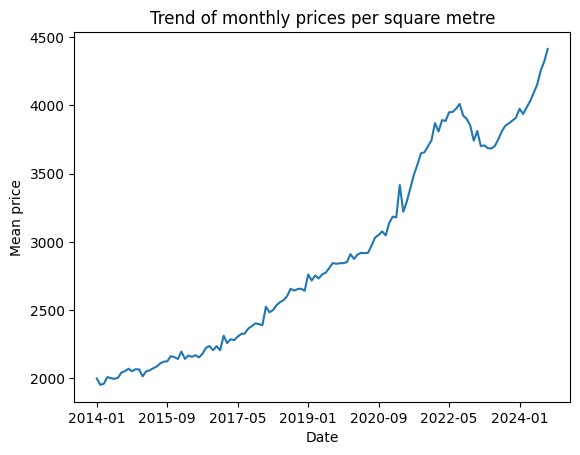

In [ ]:
mean_price.plot(use_index=True, ylabel="Mean price", xlabel="Date", title="Trend of monthly prices per square metre")

In [ ]:
mean_price_per_gemeente = df_orig.groupby("COROPPLUSCODE")["Price_per_sq_metre"].mean()

<AxesSubplot:title={'center':'Trend of prices per corop region'}, xlabel='COROPPLUS', ylabel='Mean price'>

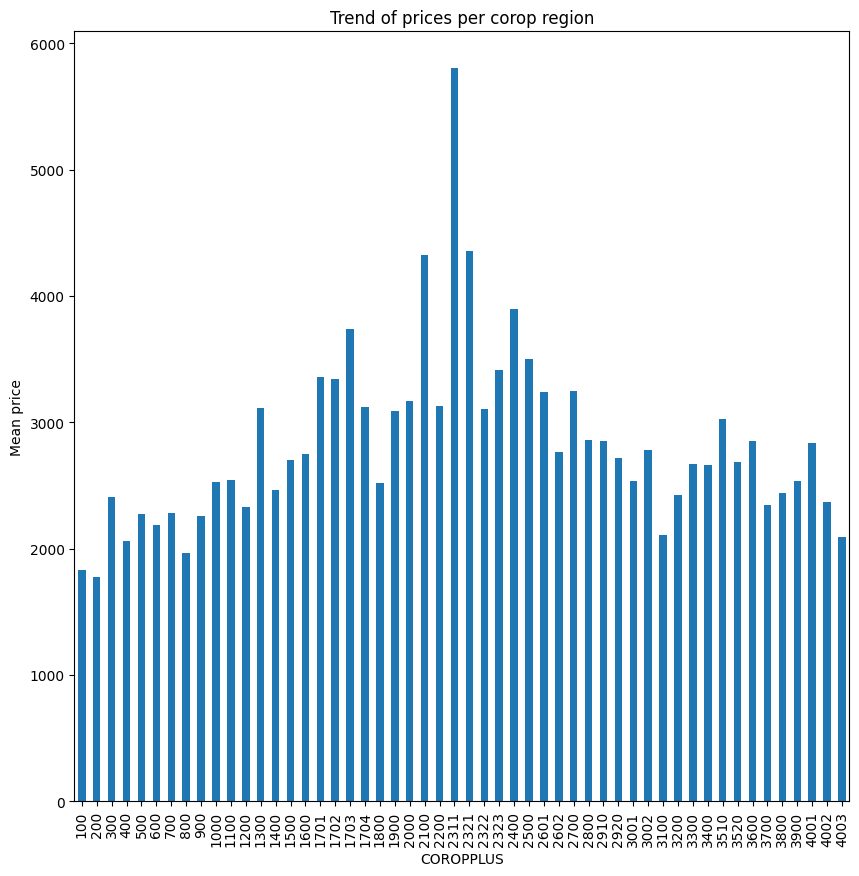

In [ ]:
mean_price_per_gemeente.plot(use_index=True, kind="bar",ylabel="Mean price", xlabel="COROPPLUS", title="Trend of prices per corop region", figsize=(10,10))

In [ ]:
amsterdam = df_orig[df_orig["COROPPLUSCODE"] == 2311]
rotterdam = df_orig[df_orig["COROPPLUSCODE"] == 2910]


mean_price_amsterdam = amsterdam.groupby("DATUM")["Price_per_sq_metre"].mean()
mean_price_rotterdam = rotterdam.groupby("DATUM")["Price_per_sq_metre"].mean()

mean_price_amsterdam

DATUM
2014-01    3281.742768
2014-02    3295.132843
2014-03    3244.529978
2014-04    3345.132824
2014-05    3403.250448
              ...     
2024-05    8004.622808
2024-06    8211.801037
2024-07    8253.858944
2024-08    8554.813136
2024-09    8402.060994
Name: Price_per_sq_metre, Length: 129, dtype: float64

In [ ]:
mean_price_rotterdam

DATUM
2014-01    1800.179058
2014-02    1774.790768
2014-03    1785.067936
2014-04    1791.335220
2014-05    1824.566347
              ...     
2024-05    4039.376269
2024-06    4091.140123
2024-07    4109.844551
2024-08    4209.974381
2024-09    4235.272731
Name: Price_per_sq_metre, Length: 129, dtype: float64

In [ ]:
df_prices = pd.concat([mean_price_amsterdam, mean_price_rotterdam], axis=1)
df_prices.columns =["Amsterdam", "Rotterdam"]
df_prices

,Amsterdam,Rotterdam
DATUM,,
2014-01,3281.742768,1800.179058
2014-02,3295.132843,1774.790768
2014-03,3244.529978,1785.067936
2014-04,3345.132824,1791.335220
2014-05,3403.250448,1824.566347
...,...,...
2024-05,8004.622808,4039.376269
2024-06,8211.801037,4091.140123
2024-07,8253.858944,4109.844551


<AxesSubplot:xlabel='DATUM'>

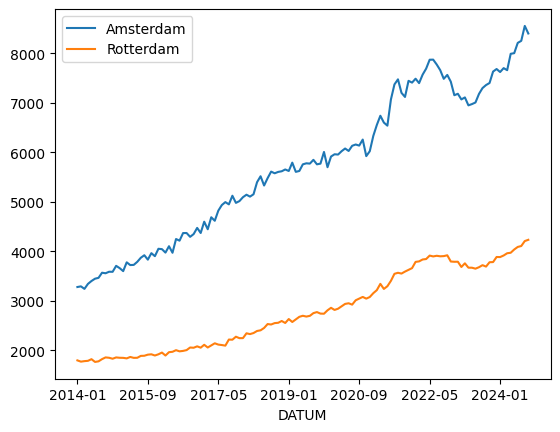

In [ ]:
import matplotlib.pyplot as plt
df_prices["Rijnmond"] = df_prices["Rotterdam"]
df_prices['Rijnmond'].plot()

<AxesSubplot:title={'center':'Trend of monthly prices per square metre'}, xlabel='Date', ylabel='Mean price'>

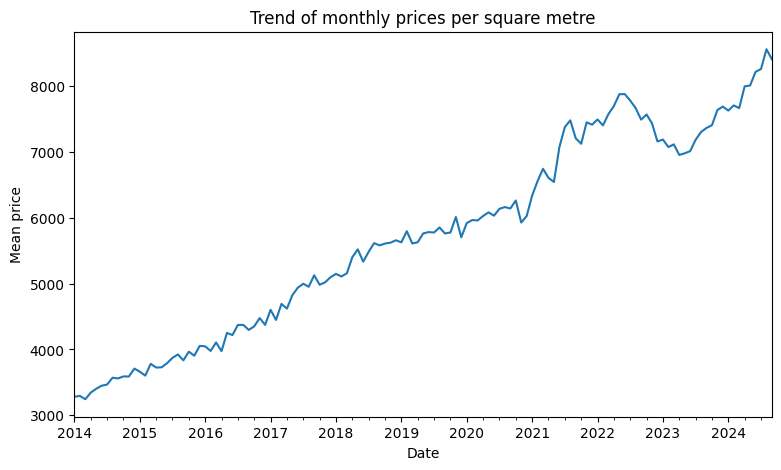

In [44]:
mean_price_amsterdam.plot(use_index=True, ylabel="Mean price", xlabel="Date", title="Trend of monthly prices per square metre", figsize=(9,5))